# Introduction
This notebook performs Exploratory Data Analysis on the Heart Diseases UCI (https://www.kaggle.com/ronitf/heart-disease-uci) to identify relationship between heart disease and various other features. 

## Step1:  Select and load python libraries for EDA
Python libraries loaded to preform the prelimnary EDA include Pandas, Numpy, Matplotlb, and Seaborn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step 2:  Load Kaggle dataset
The dataset has been downloaded and stored in a directory on my personal computer for convieninece.  Accordingly, the dataset has been loaded using the read_csv pandas command.  

In [2]:
locData=r'C:\Users\Lisa\Documents\Training\CoderGirl\Project\Data'
df=pd.read_csv(locData+'\\heart.csv')
print('Dataframe Shape:  {}'.format(df.shape))
df.head()

Dataframe Shape:  (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The dataset contains 303 observations, 13 attributes of each paient, and a target column indicating if heart desease was found.  Below is a breif definition of each of the 13 attributes and the target column.

<ol>
<li>age: The person's age in years</li>
<li>sex: The person's sex (1 = male, 0 = female)</li>
<li>cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)</li>
<li>trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)</li>
<li>chol: The person's cholesterol measurement in mg/dl</li>
<li>fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)</li>
<li>restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)</li>
<li>thalach: The person's maximum heart rate achieved</li>
<li>exang: Exercise induced angina (1 = yes; 0 = no)</li>
<li>oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)</li>
<li>slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)</li>
<li>ca: The number of major vessels (0-3)</li>
<li>thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)</li>
<li>target: Heart disease (0 = no, 1 = yes)</li>
</ol>

For clarity and ease of use the columns are renamed.

In [3]:
df.columns = ['age','gender','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar', 
              'rest_ecg','max_heart_rate_achieved','exercise_induced_angina','st_depression','st_slope', 
              'num_major_vessels','thalassemia', 'target']
df.head()

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Step3:  Identify data types, null values, and drop duplicates
In the next three code blocks the data type of each column of the dataframe is evaluated to check the data type and the number of null valuse in each column.  The patient features (i.e. attributes) had either integer or float data types, and no null values were found in any column.  However, one duplicate was observed, note the dataframe reduces from 303 rows to 302 rows.

In [4]:
df.dtypes

age                          int64
gender                       int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object

In [5]:
df.isnull().any()

age                        False
gender                     False
chest_pain_type            False
resting_blood_pressure     False
cholesterol                False
fasting_blood_sugar        False
rest_ecg                   False
max_heart_rate_achieved    False
exercise_induced_angina    False
st_depression              False
st_slope                   False
num_major_vessels          False
thalassemia                False
target                     False
dtype: bool

In [6]:
df.drop_duplicates(inplace=True)
df.shape

(302, 14)

## Step 4:  Check general dataframe statistics

General dataframe statistics were reviewed using the describe() funciton, and visualized with the seaborn distplot function.  Generally, the age, resting blood pressure, cholesteral, thalassemia, and max heart rate achieved appear to nearly normally distriubted.  The additional parameters display other behavior.

In [7]:
df.describe()

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


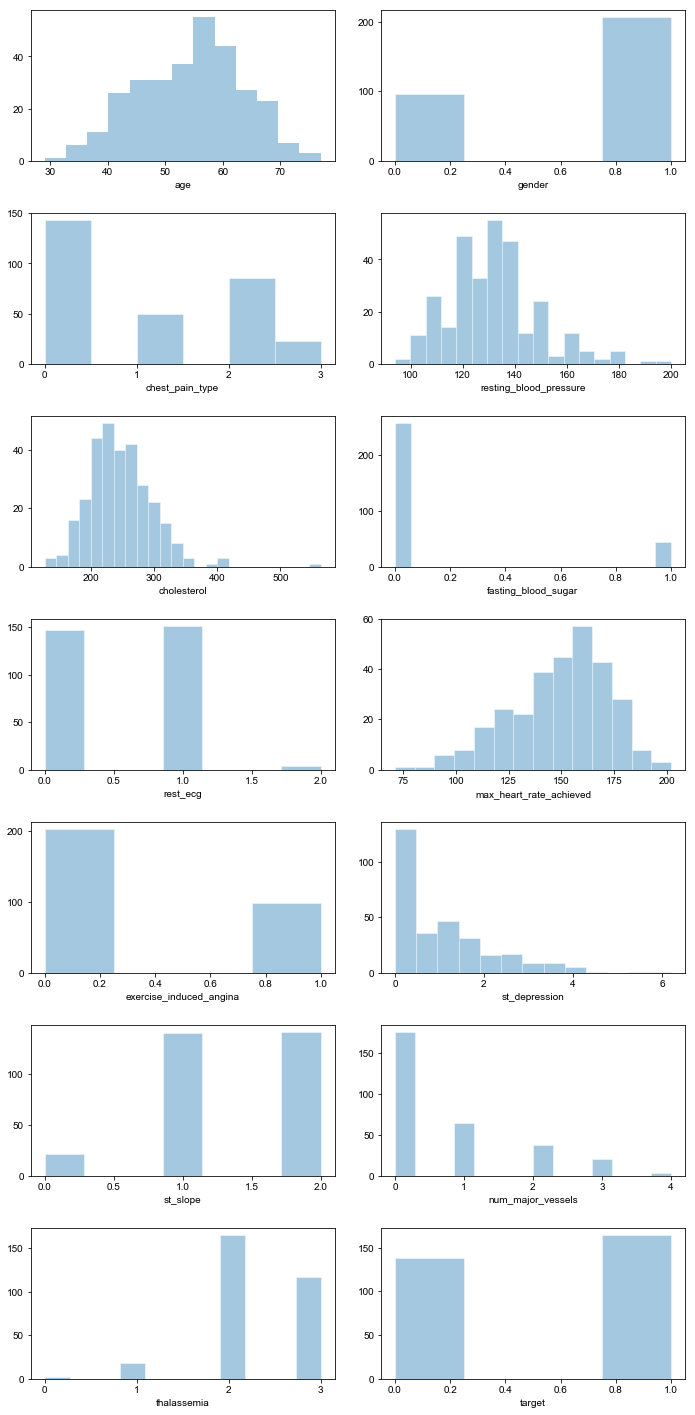

In [8]:
count=0
f,axes=plt.subplots(7,2,figsize=(10,20))

for ii in range(7):
    for jj in range(2):
        sns.distplot(df[df.columns[count]],ax=axes[ii,jj],kde=False)
        sns.set(font_scale=1.5)
        plt.tight_layout()
        count+=1

# Step 5:  Check for Outliers

Potiential outliers were observed and evaluated for st_depression, cholesterol, and resting_blood_pressure.  To evaluate the potential outliers a zoom in of the base of the histogram was reviewed to qualitatively evaluate the outlier.  Other techniques to evaluate the outliers, were as follows:

<ol>
<li>Review the dataframe row where the potential outlier exists.  This was done to determine if there was an invalid row in the data set or just simply and invalid value</li>
<li>Also, a quick google search was done to see if the suspected outlier fell within the typical max/min range of the feature</li>   
<li>If an outlier was found, it was replaced by the median feature value</li>    

## ST_Depression Outlier Check

The st_depression parameter was reviewed for outliers.  St_depression values can be as high as 6, and no other anomalous values were found in the data rows were st_depression was greater than 5.  Accordingly, it was concuded that st_depression values between 5 and 6 were not outliers.  

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


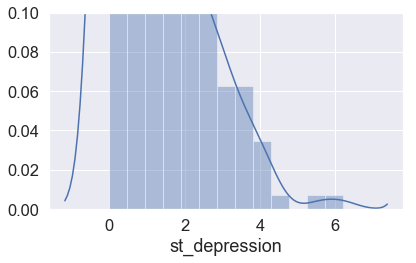

In [9]:
sns.distplot(df.st_depression)
sns.set(font_scale=1.5)
plt.tight_layout()
plt.ylim([0.00,.1])
df[df.st_depression>5]

## Cholesteral Outlier Check
The cholesteral parameter was reviewed for outliers.  Cholesteral values greater than 500 seem to be rarely documented online; however, no other anomalus values were found in the data rows were cholesteral was greater than 500.  Accordingly, it was cholesteral values greater than 500 were replaced with the median cholesteral value (240.25). 

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


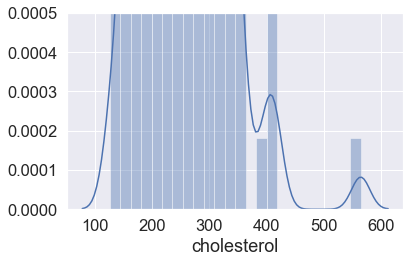

In [10]:
sns.distplot(df.cholesterol)
sns.set(font_scale=1.5)
plt.tight_layout()
plt.ylim([0.00,.0005])
df[df.cholesterol>500]

In [11]:
df.cholesterol[df.cholesterol>500]=df.cholesterol.median()

C:\Users\Lisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Resting Blood Pressure

The resting blood pressure parameter was reviewed for outliers.  Resting blood pressure values, seen online, can be as high as 200, and no other anomalous values were found in the data rows where resting blood presser was greater than 180.  Accordingly, it was concuded that resting blood pressure values between 180 and 200 were not outliers.  

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
223,56,0,0,200,288.0,1,0,133,1,4.0,0,2,3,0
248,54,1,1,192,283.0,0,0,195,0,0.0,2,1,3,0


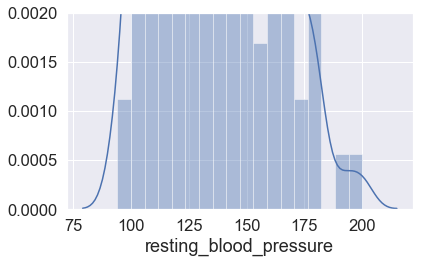

In [12]:
sns.distplot(df.resting_blood_pressure)
sns.set(font_scale=1.5)
plt.tight_layout()
plt.ylim([0.00,.002])
df[df.resting_blood_pressure>180]

## Step 6:  Evaluate the relationship between variables
A heat map is shown below to evaluate the correlation between variables.  The most highly correlated variable pair was st_slope and st_depression with an absolute correlation coefficient of 0.57.  Other highly correlated variables paris include:  exercise_induced_angina and target (absolute correlation coefficient=0.44), chest_pain_type and target (absolute correlation coefficient=0.43), and target and st_depression (absolute correlation coefficient=0.44).  Although absolute correlation is described above, varaible pairs are largely negatively correlated.  

The maximum absolute linear correlation with any feature and the Target (i.e. response variable) is 0.43, suggesting that solving for the target value requires a mulit-variate solution.

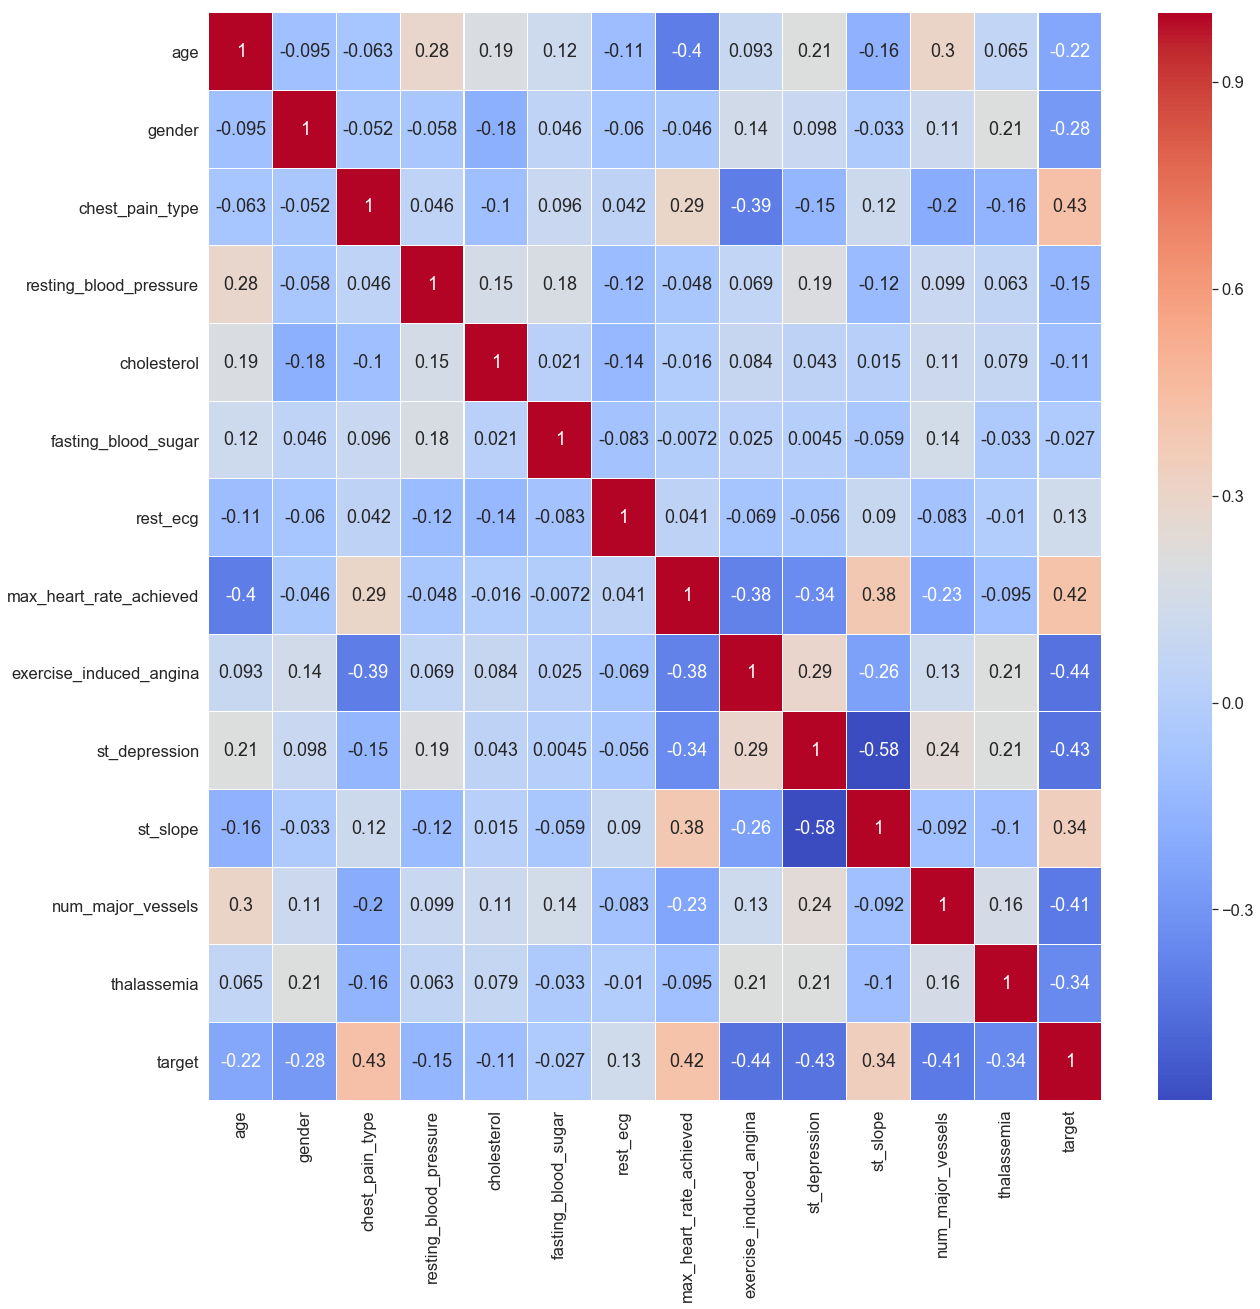

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=.1)

## Step 7:  Qualitatively review relationship between each feature and the target values

Below is a breif summary of how each feature relates to the patient estimate of heart disease.

### Age
Generally, heart disease steadily increases with age for patients 30 to 40.  Patients older than 40 observe a steady and gradual decrease in heart disease until age 65.  After age 65, there is a steady and steep decrease in heart disease patients.

### Gender
One-third of the sample size is female.  Roughly two-thirds of the female sample size was diagnosed with heart disease.  In contrast, the male patients seemed to have approximately comparable rates of heart disease and no heart disease.  

### Chest Pain
Generally, patents’ who have increased chest pain they are more likely to have heart disease.  Patients without heart disease much less frequently document the same chest pain severity.

### Blood Pressure, Cholesteral, and Fasting Blood Sugar
The blood pressure, cholesteral, and fasting blood sugar distributions for heart disease and non-heart disease patients are similar.

### Maximum Heart Rate Achieved
Maximum heart rate achieved is on average 20-30 beats per minute higher for heart disease patients that patients with out heart disease.

### Exercise Induced Angina
Exercise induced angina appears to occur most frequently in heart disease patients.

### St Depression
Both heart disease and non-heart disease patient populations decrease as st_depression increases from zero to six.  However, patients with heart disease have a much larger population at zero st_depression. 

### St Slope
Heart disease patient population increases with increased value of st_slope (from 0 to 2).  In contrast, non-heart disease patient population is maximum at an st_slope value of 2.  

### Number of major blood vessels
Both heart disease and non-heart disease patients showed lower populations as the number of visible blood vessels increased.  However, heart disease patients showed a much more dramatic negative gradient than the non-heart disease patients.  This might suggest that non-heart disease patients generally have more visible blood vessels. 

### Thalassemia
Heart disease patients generally had a thalassemia score of 2, indicating a fixed defect.  In contrast, non-heart disease patients most frequently had a score of 3, indicating a reversable defect.

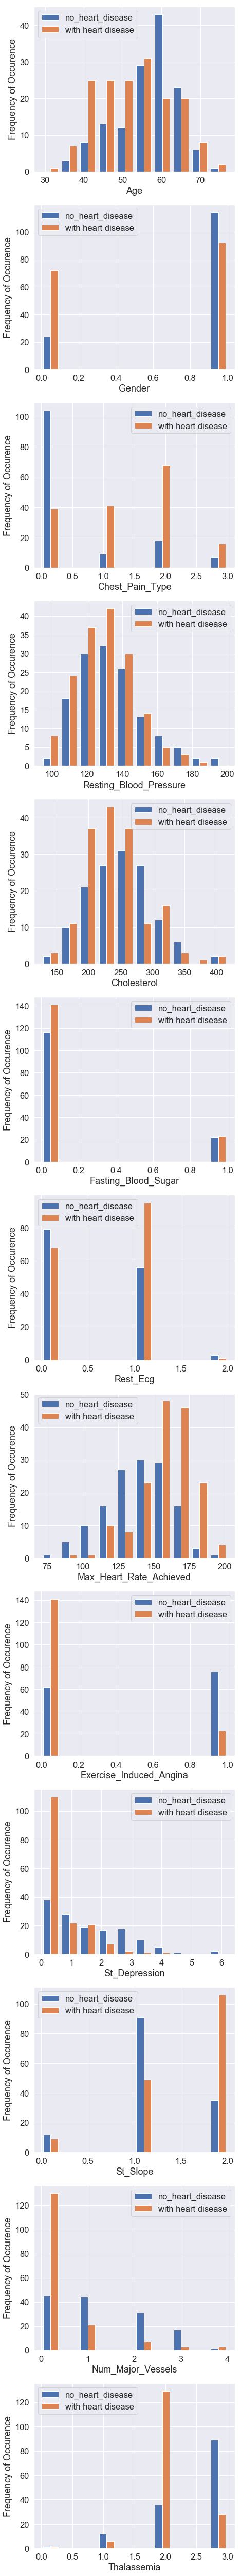

In [14]:
f,axes=plt.subplots(13,1,figsize=(7,91))

for ii,ax in enumerate(axes):
    ax.hist([df[df.columns[ii]][df.target==0],df[df.columns[ii]][df.target==1]],
            label=["no_heart_disease","with heart disease"])
    ax.set_xlabel(df.columns[ii].title())
    ax.set_ylabel("Frequency of Occurence")
    ax.legend()

# Step 8:  Export conditioned dataset for next steps (i.e. modeling and plotting)
The conditioned data was exported as a python pickle file for use in next steps of this project.

In [15]:
df.to_pickle(locData+'\\heart.pkl')